In [94]:
import numpy as np
from matplotlib import pyplot as plt
import json, os

In [232]:
run = 1
Gamma0 = 50.00
rhoseed = 0.5 #0.9#0.16
rgamma = 2.0
gammaxx=1.0
gammayy=gammaxx*rgamma

p0 = 1
alpha = 1
D = 4
chi = 4

#pdir = '../../data/model_Q_v_rho/gamma0_{:1.1f}_rhoseed_{}_gammaxx_{:1.1f}/p0_{:1.2f}_alpha_{:1.2f}_D_{:1.2f}_chi_{:1.2f}/run_{:d}/'.format(Gamma0, rhoseed, gammaxx, p0, alpha, D, chi, run)
pdir = '../../data/model_Q_v_rho_heaviside/gamma0_{:1.1f}_rhoseed_{}_rgamma_{:1.1f}/p0_{:1.2f}_alpha_{:1.2f}_D_{:1.2f}_chi_{:1.2f}/run_{:d}/'.format(Gamma0, rhoseed, rgamma, p0, alpha, D, chi, run)

datadir = pdir+'data/'

with open(pdir+'parameters.json') as jsonFile:
    parameters = json.load(jsonFile)

T         = parameters["T"]        # final time
dt_dump   = parameters["dt_dump"]
n_steps   = int(parameters["n_steps"])  # number of time steps
n_dump = int(T/dt_dump); dn_dump = int(n_steps/n_dump)
K         = parameters["K"]        # elastic constant, sets diffusion lengthscale of S with Gamma0
lambd     = parameters["lambda"]
r_p       = parameters["r_p"]      # rate of pressure growth equal to rate of growth of cells
rho_in    = parameters["rho_in"]   # isotropic to nematic transition density, or "onset of order in the paper"
rhoisoend = parameters["rhoisoend"] /rho_in   # jamming density
rhonemend = parameters["rhonemend"] /rho_in   # jamming density max for nematic substrate
mx        = np.int32(parameters["mx"])
my        = np.int32(parameters["my"])
dx        = np.float32(parameters["dx"])
dy        = np.float32(parameters["dy"])
#setup a meshgrid
tol = 0.001

x   = np.linspace(0+tol, 1-tol, mx)
y   = np.linspace(0+tol, 1-tol, my)
xv, yv  = np.meshgrid(x,y)


times = np.arange(0, n_dump, 1)*dt_dump

1.5701145441345377 1.412550720448319
1.514659144692862


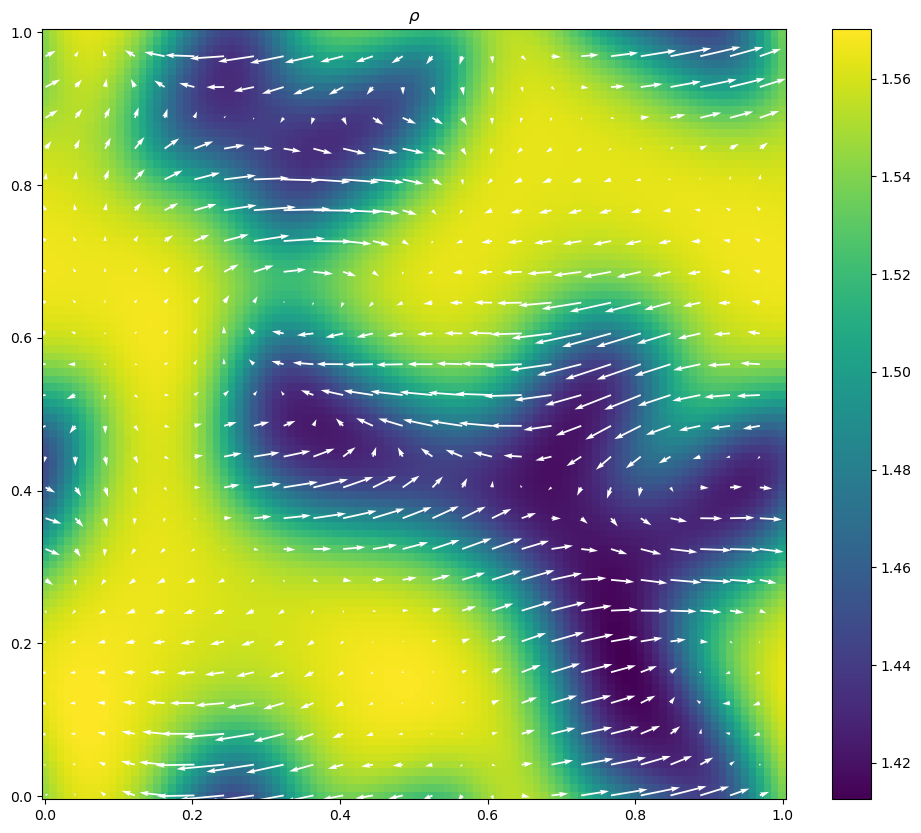

In [233]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

fig, ax=plt.subplots(figsize=(12,10))
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
n=1999

field = np.loadtxt(datadir+'rho.csv.{:d}'.format(n), delimiter=',')
#Qx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
#Qy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
#S2 = Qx**2 + Qy**2
#rhoend = rhoisoend + (rhonemend-rhoisoend)*S2
#Gamma = np.heaviside(Gamma0*np.tanh(rhoend-field),0)
vx = np.loadtxt(datadir+'vx.csv.{:d}'.format(n), delimiter=',')
vy = np.loadtxt(datadir+'vy.csv.{:d}'.format(n), delimiter=',')
p_factor = 4
vx = pixelate(vx, p_factor)
vy = pixelate(vy, p_factor)

fmax = np.max(field); fmin=np.min(field); print(fmax, fmin)
print(np.average(field))
#ctrf = [ax.pcolormesh(xv, yv, S_sqrd[i], cmap=cmap1, vmin=0, vmax=Smax), ax.quiver(xv,yv,nx[i],ny[i], color='w')]
ctrf = [ax.pcolormesh(xv, yv, field, vmin=fmin, vmax=fmax), ax.quiver(xv[::p_factor, ::p_factor], yv[::p_factor, ::p_factor], vx[::p_factor, ::p_factor], vy[::p_factor, ::p_factor], color='w')]
plt.colorbar(ctrf[0])
plt.title(r"$\rho$")
plt.show()

-0.0


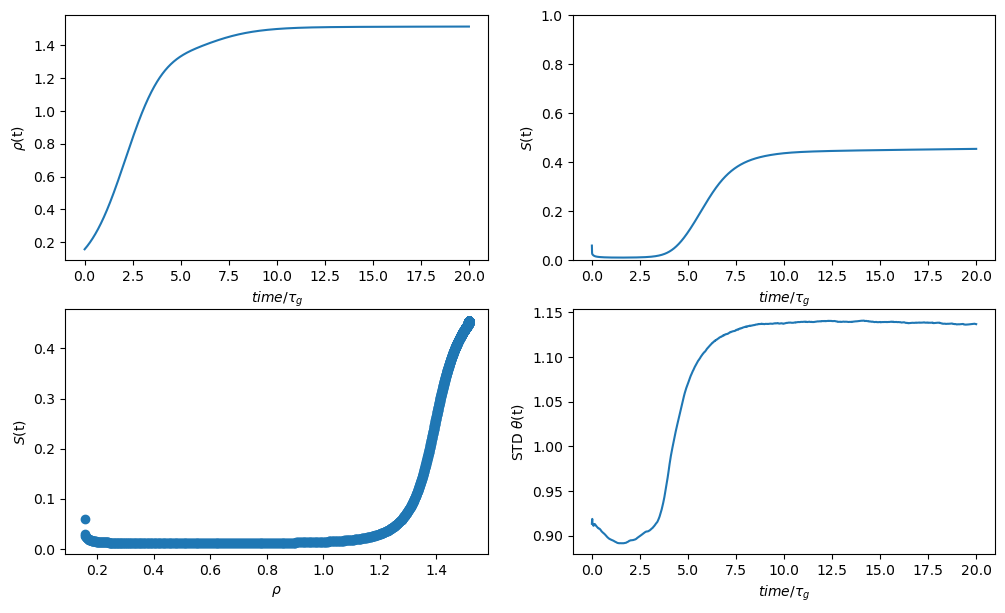

In [234]:
Rho = np.loadtxt(pdir+'/processed_data/meanrho.csv', delimiter=',')
Ssum= np.loadtxt(pdir+'/processed_data/meanS.csv', delimiter=',')
stdtheta = np.loadtxt(pdir+'/processed_data/stdtheta.csv', delimiter=',')
meantheta = np.loadtxt(pdir+'/processed_data/meantheta.csv', delimiter=',')
Rhoend = rhoisoend + (rhonemend-rhoisoend)*Ssum**2
Gamma_rho = Gamma0*np.heaviside(np.tanh(Rhoend - Rho),0)*np.tanh(Rhoend - Rho)
print(Gamma_rho[-1])
fig, ax = plt.subplots(figsize=(12,7), ncols=2, nrows=2)
ax[0,0].plot(times, Rho); ax[0,0].set_xlabel(r'$time/\tau_g$'); ax[0,0].set_ylabel(r'$\rho$(t)');
ax[0,1].plot(times, Ssum); ax[0,1].set_xlabel(r'$time/\tau_g$'); ax[0,1].set_ylabel(r'$S$(t)');
ax[0,1].set_ylim(0,1);
ax[1,0].scatter(Rho, Ssum); ax[1,0].set_xlabel(r'$\rho$'); ax[1,0].set_ylabel(r'$S$(t)');
ax[1,1].plot(times, stdtheta); ax[1,1].set_xlabel(r'$time/\tau_g$'); ax[1,1].set_ylabel(r'STD $\theta$(t)');

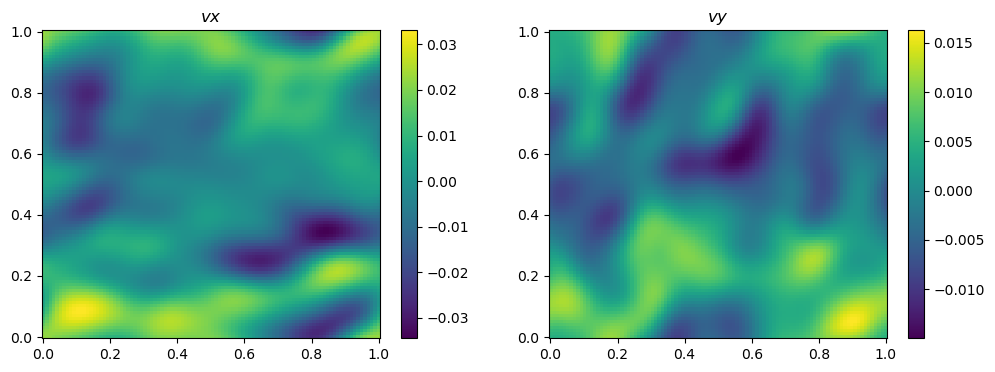

In [184]:
n=300
vx = np.loadtxt(datadir+'vx.csv.{:d}'.format(n), delimiter=',')
vy = np.loadtxt(datadir+'vy.csv.{:d}'.format(n), delimiter=',')

fig, ax=plt.subplots(figsize=(12,4),ncols=2)
plot1 = [ax[0].pcolormesh(xv, yv, vx, cmap='viridis', vmin=np.min(vx), vmax=np.max(vx))]
plot2 = [ax[1].pcolormesh(xv, yv, vy, cmap='viridis', vmin=np.min(vy), vmax=np.max(vy))]

fig.colorbar(plot1[0], ax=ax[0])
fig.colorbar(plot2[0], ax=ax[1])
ax[0].set_title(r"$ vx $")
ax[1].set_title(r"$ vy $")
plt.show()

0.5951869111459307 0.0017426457247109348


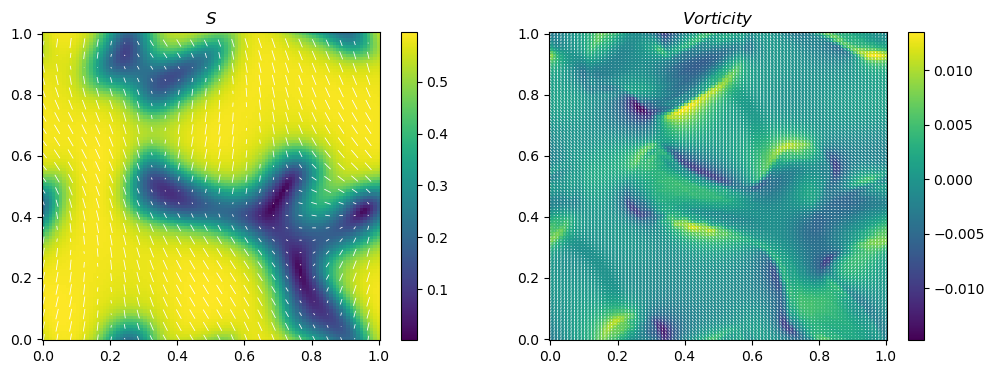

In [226]:
fig, ax=plt.subplots(figsize=(12,4),ncols=2)
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

n=1999


Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
curldivQ = np.loadtxt(datadir+'curldivQ.csv.{:d}'.format(n), delimiter=',')
S = np.sqrt(Qxx**2+Qxy**2)
p_factor = 4
theta = np.arctan2(Qxy, Qxx)/2
Snx    = pixelate(S*np.cos(theta), p_factor)
Sny    = pixelate(S*np.sin(theta), p_factor)
print(np.max(S), np.min(S))

plot1 = [ax[0].pcolormesh(xv, yv, S, cmap='viridis', vmin=np.min(S), vmax=np.max(S)), ax[0].quiver(xv[::p_factor, ::p_factor],yv[::p_factor, ::p_factor],Snx[::p_factor, ::p_factor],Sny[::p_factor, ::p_factor], color='w', pivot='middle', headlength=0, headaxislength=0)]
plot2 = [ax[1].pcolormesh(xv, yv, curldivQ, cmap='viridis', vmin=np.min(curldivQ), vmax=np.max(curldivQ)), ax[1].quiver(xv,yv,Snx,Sny, color='w', pivot='middle', headlength=0, headaxislength=0)]

fig.colorbar(plot1[0], ax=ax[0])
fig.colorbar(plot2[0], ax=ax[1])
ax[0].set_title(r"$ S $")
ax[1].set_title(r"$ Vorticity $")
plt.show()

0.01348187913126605 -0.01478896765456612
0.11388467992436879
-0.45381150652715313


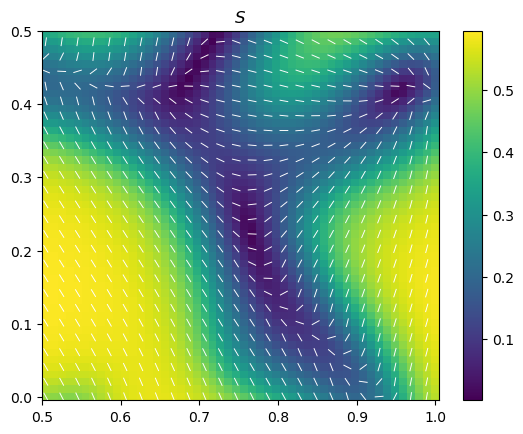

In [227]:
fig, ax=plt.subplots()
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

n=1999

charge = np.loadtxt(datadir+'curldivQ.csv.{:d}'.format(n), delimiter=',')
Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
S = np.sqrt(Qxx**2+Qxy**2)
theta = np.arctan2(Qxy, Qxx)/2
nx    = np.cos(theta)
ny    = np.sin(theta)

print(np.max(charge), np.min(charge))

p_factor = 2
pcharge = pixelate(2*charge/S, p_factor)
print(np.max(pcharge))
p_half_defects = np.where((pcharge)>0.2)
m_half_defects = np.where((-pcharge)>0.2)
#print(p_half_defects, m_half_defects)

pnx = np.cos(pixelate(theta, p_factor))
pny = np.sin(pixelate(theta, p_factor))
print(np.mean(theta))

ix, fx, iy, fy = 0, 50, 50, 100
ctrf = [ax.pcolormesh(xv[ix:fx, iy:fy], yv[ix:fx, iy:fy], (S)[ix:fx, iy:fy], cmap='viridis', vmin=np.min(S), vmax=np.max(S))]
ax.quiver(xv[ix:fx:p_factor, iy:fy:p_factor],yv[ix:fx:p_factor, iy:fy:p_factor], pnx[ix:fx:p_factor, iy:fy:p_factor], pny[ix:fx:p_factor, iy:fy:p_factor], color='w', pivot='middle', headlength=0, headaxislength=0)
#ax.scatter(p_half_defects[1]/mx, p_half_defects[0]/my, color='pink')
#ax.scatter(m_half_defects[1]/mx, m_half_defects[0]/my, color='red')
#ctrf = [ax.pcolormesh(xv, yv, rho[i], cmap=cmap1, vmin=np.min(rho), vmax=np.max(rho)), ax.quiver(xv,yv,nx[i],ny[i], color='w', headlength=0, headaxislength=0, width=0.006, pivot='middle')]
#ctrf = [ax.pcolormesh(xv, yv, rho[i]*v[i,:,:,1])]
plt.colorbar(ctrf[0])
plt.title(r"$ S $")
plt.show()

In [7]:
def pixelate(x, gridpoints):
    nx, ny = np.shape(x)
    xpad = np.pad(x, (gridpoints, gridpoints), 'wrap')
    ret = np.zeros(np.shape(x))
    for cx in np.arange(nx):
        for cy in np.arange(ny):
            ret[cx, cy] += np.average(xpad[cx:cx+1+2*gridpoints, cy:cy+1+2*gridpoints])
    return ret